In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("D:\\csvFiles\\drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
df.shape

(200, 6)

In [4]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
df["Sex"].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [6]:
df["Sex"] = df["Sex"].map({"M":0,"F":1})
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,HIGH,HIGH,25.355,drugY
1,47,0,LOW,HIGH,13.093,drugC
2,47,0,LOW,HIGH,10.114,drugC
3,28,1,NORMAL,HIGH,7.798,drugX
4,61,1,LOW,HIGH,18.043,drugY


In [7]:
df["BP"].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [8]:
df["BP"] = df["BP"].map({"HIGH":0,"LOW":1,"NORMAL":2})
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,0,HIGH,25.355,drugY
1,47,0,1,HIGH,13.093,drugC
2,47,0,1,HIGH,10.114,drugC
3,28,1,2,HIGH,7.798,drugX
4,61,1,1,HIGH,18.043,drugY


In [9]:
df["Cholesterol"].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [10]:
df["Cholesterol"] = df["Cholesterol"].map({"HIGH":0,"NORMAL":1})
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,0,0,25.355,drugY
1,47,0,1,0,13.093,drugC
2,47,0,1,0,10.114,drugC
3,28,1,2,0,7.798,drugX
4,61,1,1,0,18.043,drugY


In [11]:
df["Drug"].value_counts()

drugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64

In [12]:
df["Drug"] = df["Drug"].map({"drugX":0,"drugY":1,"drugA":2,"drugB":3,"drugC":4})
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,0,0,25.355,1
1,47,0,1,0,13.093,4
2,47,0,1,0,10.114,4
3,28,1,2,0,7.798,0
4,61,1,1,0,18.043,1


In [13]:
feature_cols = ["Age","Sex","BP","Cholesterol","Na_to_K"]
x = df[feature_cols]
y = df["Drug"]

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size = 0.25, random_state= 0)

In [15]:
#feature scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [16]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

In [17]:
#prediction

y_pred = clf.predict(x_test)

In [18]:
#accuracy

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,y_pred)
accuracy

1.0

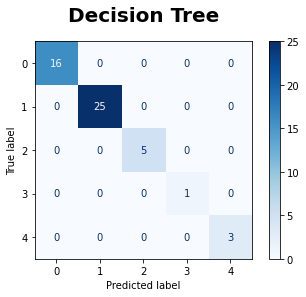

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_log = disp_log.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("Decision Tree", pad= 20, fontsize= 20, fontweight= "bold")
plt.show()

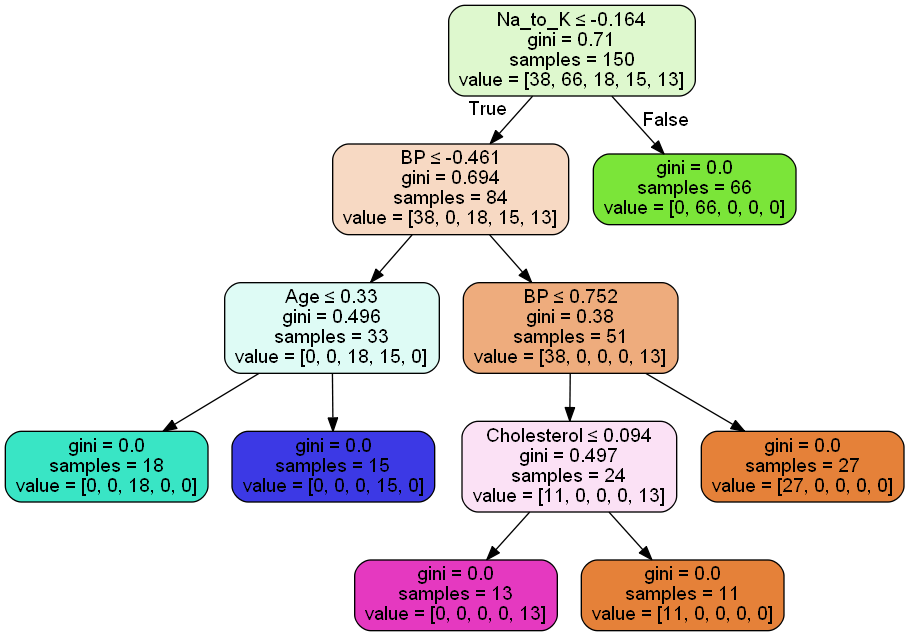

In [20]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('drug.png')
Image(graph.create_png())